# Validation of Zhu and others (2017)

In this section, we demonstrate that our implementation of the Zhu and others (2017) general model yields the same output as results reported in the original paper. There may be slight differences due to different shakemap versions or minor differences in the exact colorbars used. Here we compare against the relative hazard outputs of the model because that is what is shown in the figures from the original paper. In the paper, Zhu and others (2017) present a conversion from relative hazard to areal coverage that we use in our implementation.


## Wenchuan earthquake



In [9]:
#stdlib imports
from configobj import ConfigObj
import os
import pprint
import numpy as np
import matplotlib

#local imports
from gfail.logisticmodel import LogisticModel
from gfail.conf import correct_config_filepaths
from gfail.utilities import parseConfigLayers, parseMapConfig
from gfail import makemaps

import warnings
warnings.filterwarnings('ignore')

# Set up file paths
# Directory containing model inputs
datadir = 'data/model_inputs/wenchuan'
# Path to mapping inputs for static plots
map_inputs = 'data/mapping_inputs/wenchuan'

# Path to config files
configfileZ2 = '../defaultconfigfiles/models/zhu_2017_general.ini'
mapconfig = '../defaultconfigfiles/mapconfig.ini'

# Path to shakemap .xml files
shakefile = 'data/shakemaps/wenchuan.xml'

In [2]:
# Read in the config file for this model. This contains all of the information needed to run the model
config = ConfigObj(configfileZ2)

# append the data directory to the relative paths in the config file
config = correct_config_filepaths(datadir, config)
# View the config file
#pprint.pprint(config)

# Turn off conversion to areal coverage in config file
del config['zhu_2017_general']['coverage']

# Change to same resolution
del config['zhu_2017_general']['divfactor']


# Remove minpga restriction for consistency with Zhu paper (this threshold was added in a subsequent paper)
#config['zhu_2017_general']['minpga'] = 0. # %g
#config['zhu_2017_general']['minpgv'] = 0.  # cm/s

In [3]:
bounds = dict(xmin=103.5, xmax=104.5, ymin=30.5, ymax=31.5)

# Run the model (this will take a minute)
lmn = LogisticModel(shakefile, config, saveinputs=True, bounds=bounds)
maplayers = lmn.calculate()

Loading dc layer: 0.0 sec
Loading dr layer: 0.0 sec
Loading vs30 layer: 0.0 sec
Loading precip layer: 0.0 sec
Loading wtd layer: 0.0 sec


### Change bins to match figure from paper


In [4]:
lims = [[0., 0.2, 0.3, 0.5, 0.6]]
colorlist = ['#DCDCDC','#FBF6A5', '#FCC14F', '#E95659']  #hex code for colors in figure below
CustomCmap = matplotlib.colors.ListedColormap(colorlist)
colormap = [CustomCmap]

maskthresh = [0.]  # to represent gray color on figure

### Create the figure

roadfolder not valid - roads will not be displayed

cities file not valid - cities will not be displayed

No output location given, using current directory for outputs

Input boundaries are almost the same as specified boundaries, no cutting needed
Not able to read specified ocean file, will use default ocean masking


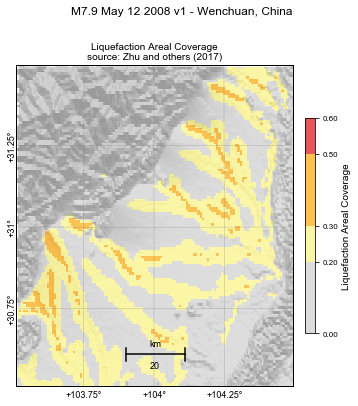

In [5]:
# read in general mapping preferences
mapconfig = ConfigObj(mapconfig)
kwargs = parseMapConfig(mapconfig, fileext=map_inputs)

#plotorder, logscale, lims, colormaps, maskthreshes = parseConfigLayers(maplayers, config)

# Make the figure
temp = makemaps.modelMap(maplayers, shakefile, lims=lims, maskthreshes=maskthresh, plotorder=['model'],
         logscale=False, maproads=True, mapcities=True, showplots=True, printparam=False,
         inventory_shapefile=None, scaletype='binned', savepdf=False, savepng=False, boundaries=bounds,
         colormaps=colormap, **kwargs)

### Compare to the result from the original paper for this event (below)
<img src="data/images/zhu2017general_wenchuan.png" alt="From Paper" style="width: 500px;" align="left"/>

## Northridge

In [6]:
# Path to shakemap .xml files
shakefile2 = 'data/shakemaps/northridge.xml'
bounds2 = dict(xmin=-118.7, xmax=-118.2, ymin=33.9, ymax=34.4)

# Set up file paths
# Directory containing model inputs
datadir = 'data/model_inputs/northridge'
# Path to mapping inputs for static plots
map_inputs = 'data/mapping_inputs/northridge'

# Reload config file with new paths
config2 = ConfigObj(configfileZ2)

# append the data directory to the relative paths in the config file
config2 = correct_config_filepaths(datadir, config2)

# Turn off conversion to areal coverage in config file
del config2['zhu_2017_general']['coverage']

# Change to same resolution
del config2['zhu_2017_general']['divfactor']

# read in general mapping preferences
kwargs2 = parseMapConfig(mapconfig, fileext=map_inputs)

roadfolder not valid - roads will not be displayed

cities file not valid - cities will not be displayed



In [7]:
# Run the model (this will take a minute)
lmn2 = LogisticModel(shakefile2, config2, saveinputs=False, bounds=bounds2)
maplayers2 = lmn2.calculate()

Loading dc layer: 0.0 sec
Loading dr layer: 0.0 sec
Loading vs30 layer: 0.0 sec
Loading precip layer: 0.0 sec
Loading wtd layer: 0.0 sec


No output location given, using current directory for outputs

Input boundaries are almost the same as specified boundaries, no cutting needed
Not able to read specified ocean file, will use default ocean masking


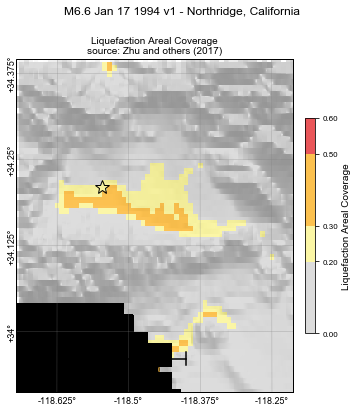

In [8]:
# Make the figure
temp = makemaps.modelMap(maplayers2, shakefile2, lims=lims, maskthreshes=maskthresh, plotorder=['model'],
         logscale=False, maproads=True, mapcities=True, showplots=True, printparam=False,
         inventory_shapefile=None, scaletype='binned', savepdf=False, savepng=False, boundaries=bounds2,
         colormaps=colormap, **kwargs2)

### Compare to the result from the original paper for this event (below)
<img src="data/images/zhu2017general_northridge.png" alt="From Paper" style="width: 500px;" align="left"/>